In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from load_file import load_csv

[load_file](https://github.com/ImperadorSid/dotfiles/blob/master/.python-scripts/load_file.py)

In [2]:
signal = lambda number: 1 if number >= 0 else -1

In [3]:
test_adaline = lambda x, w: np.array([signal(w @ sample) for sample in x])

In [4]:
calc_mse = lambda x, d, w: sum([(d[i] - w @ x[i]) ** 2  for i in range(d.shape[0])]) / d.shape[0]

In [5]:
def train_adaline(x, d, n=10**-2, e=10**-6, w=[]):
  samples = x.shape[0]
  inputs = x.shape[1]
  epochs = 0
  mses = []
  
  if w == []:
    w = np.random.random([1, inputs])
  initial_w = np.copy(w)

  while True:
    epochs += 1
    
    last_mse = calc_mse(x, d, w)
    for i in range(samples):
      u = w @ x[i]
      w += n * (d[i] - u) * x[i]
    current_mse = calc_mse(x, d, w)
    
    mses.append(current_mse)
        
    if abs(current_mse - last_mse) <= e: break
      
  return initial_w, w, mses, epochs

In [6]:
x, d = load_csv('../../datasets/valvula.csv')
df_d = pd.Series(d, name='d')

Training 1 - 936 epochs
Initial weights: [[0.90571748 0.65867223 0.75456987 0.90156977 0.69926524]]
Weights: [[-1.8130467   1.31293707  1.6423697  -0.4275088  -1.17781414]]

Training 2 - 948 epochs
Initial weights: [[0.9714914  0.00909959 0.130616   0.77407123 0.38398537]]
Weights: [[-1.81308031  1.3129035   1.64233761 -0.42761031 -1.1777979 ]]

Training 3 - 900 epochs
Initial weights: [[0.1702971  0.56649978 0.2332528  0.55256929 0.53477038]]
Weights: [[-1.81312369  1.31287997  1.64232103 -0.42770207 -1.1777913 ]]

Training 4 - 929 epochs
Initial weights: [[0.76003652 0.2278381  0.50058973 0.93471115 0.0746207 ]]
Weights: [[-1.81303297  1.3129248   1.6423502  -0.42751887 -1.17780193]]

Training 5 - 913 epochs
Initial weights: [[0.76670242 0.50714517 0.89828097 0.81945791 0.01682922]]
Weights: [[-1.81303103  1.31294201  1.64237123 -0.4274827  -1.17781395]]



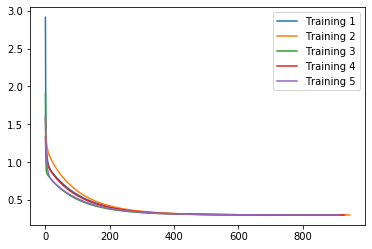

In [27]:
for i in range(1, 6):
  initial_w, w, errors, epochs = train_adaline(x, d, n=.0025, e=10**-6)
  print('Training {} - {} epochs\nInitial weights: {}\nWeights: {}\n'.format(i, epochs, initial_w, w))
  plt.plot(range(epochs), errors, label='Training {}'.format(i))
  plt.legend()
plt.show()

In [14]:
inputs = pd.read_csv('../../datasets/valvula2.csv').to_numpy()
inputs

array([[-1.    ,  0.9694,  0.6909,  0.4334,  3.4965],
       [-1.    ,  0.5427,  1.3832,  0.639 ,  4.0352],
       [-1.    ,  0.6081, -0.9196,  0.5925,  0.1016],
       [-1.    , -0.1618,  0.4694,  0.203 ,  3.0117],
       [-1.    ,  0.187 , -0.2578,  0.6124,  1.7749],
       [-1.    ,  0.4891, -0.5276,  0.4378,  0.6439],
       [-1.    ,  0.3777,  2.0149,  0.7423,  3.3932],
       [-1.    ,  1.1498, -0.4067,  0.2469,  1.5866],
       [-1.    ,  0.9325,  1.095 ,  1.0359,  3.3591],
       [-1.    ,  0.506 ,  1.3317,  0.9222,  3.7174],
       [-1.    ,  0.0497, -2.0656,  0.6124, -0.6585],
       [-1.    ,  0.4004,  3.5369,  0.9766,  5.3532],
       [-1.    , -0.1874,  1.3343,  0.5374,  3.2189],
       [-1.    ,  0.506 ,  1.3317,  0.9222,  3.7174],
       [-1.    ,  1.6375, -0.7911,  0.7537,  0.5515]])

[valvula2.csv](https://github.com/ImperadorSid/datasets/blob/master/valvula2.csv)

In [9]:
trained_weights = np.array([[-1.8130467,1.31293707,1.6423697,-0.4275088,-1.17781414],
[-1.81308031,1.3129035,1.64233761,-0.42761031,-1.1777979],
[-1.81312369,1.31287997,1.64232103,-0.42770207,-1.1777913],
[-1.81303297,1.3129248,1.6423502,-0.42751887,-1.17780193],
[-1.81303103,1.31294201,1.64237123,-0.4274827,-1.17781395]])

In [15]:
results = pd.DataFrame(
  {'y' + str(i + 1):
   test_adaline(inputs, trained_weights[i])
   for i in range(5)}
)
results

,y1,y2,y3,y4,y5
0,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1
2,1,1,1,1,1
3,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1
5,1,1,1,1,1
6,1,1,1,1,1
7,1,1,1,1,1
8,1,1,1,1,1
9,-1,-1,-1,-1,-1
